# MMS SITL Ground Loop: Case Studies
This notebook demonstrates, with the help of some utility functions also included in the repo, how to reproduce the figure and table associated with the case studies in Argall, Small, et al. (2020). The figure consists of three separate figures that were saved combined into a single file with another application. The table contains SITL selections made within the time intervals displayed in the figure.

**CONTENTS**
* [GLS, ABS, and SITL all select the magnetopause](#fig_left)
* [ABS does not select the magnetopause](#fig_middle)
* [GLS does not select the magnetopause](#fig_right)

In [1]:
# Where to save files and figures. Set to None to prevent output
import pymms
outdir = pymms.config['gls_root'] + '/gls_paper'
fig_type = 'png' # png, jpg, svg, eps, ...

We need to import the `util` module from the repository, but the notebook does not know where the repository is [\[1\]](https://github.com/ipython/ipython/issues/10123). So, we assume that the notebook was run from the directory in which it is was saved, then add that directory to the system path [\[2\]](https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im).

In [2]:
import os
import sys
repo_dir = os.getcwd()
if not os.path.isfile(os.path.join(repo_dir, 'util.py')):
    raise ValueError('Could not automatically determine the model root.')
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
import util

from pymms.sdc import selections as sel
from pymms.sdc import mrmms_sdc_api as api
import datetime as dt
from matplotlib import pyplot as plt
import pathlib

if outdir is not None:
    outdir = pathlib.Path(outdir).expanduser().absolute()

Set common axis limits for the plots

In [3]:
sc = 'mms1'
i_clim = (3, 18.5)
e_clim = (12, 21.5)
b_lim = (-40, 75)
n_lim = (5e-1, 1e2)
sel_lim = (0, 200)

<a id='fig_left'></a>
## GLS, ABS, and SITL all identify MP
Selections that were not at the magnetopause-like but contained time intervals with plasma mixing that were magnetopause-like. For this we will look at SROI1 of orbit 1051.

In [4]:
t0 = dt.datetime(2019, 11, 5, 19, 15, 0)
t1 = dt.datetime(2019, 11, 5, 20, 45, 0)
orbit = api.time_to_orbit(t0)
sroi = 1

Get the SITL, ABS, and GLS selections.

In [5]:
# 'sitl+back' option includes selections submitted to the back structure
# 'mp-dl-unh' is the name of the GLS model
sitl_data = sel.selections('sitl+back', t0, t1, combine=True, sort=True)
abs_data = sel.selections('abs', t0, t1, combine=True, sort=True)
gls_data = sel.selections('mp-dl-unh', t0, t1, combine=True, sort=True)

print('|------------------------------------------------------------------------')
print('| Selections made on orbit {0} between {1} and {2}'.format(orbit, t0, t1))
print('|--------------------------|')
print('| SITL and Back Structure: |')
print('|--------------------------|')
sel.print_segments(sitl_data)
print('|------|')
print('| ABS: |')
print('|------|')
sel.print_segments(abs_data)
print('|------|')
print('| GLS: |')
print('|------|')
sel.print_segments(gls_data)

GLS Selection Adjustments:
  # files skipped:    10
  # entries skipped:  0
  # entries expanded: 12
|------------------------------------------------------------------------
| Selections made on orbit 1055 between 2019-11-05 19:15:00 and 2019-11-05 20:45:00
|--------------------------|
| SITL and Back Structure: |
|--------------------------|
             TSTART                 TSTOP   FOM   DISCUSSION
2019-11-05 19:27:03   2019-11-05 19:38:23   150   Lower shear full magnetopause crossing with Vz flow reversal
2019-11-05 19:52:53   2019-11-05 19:59:43   150   Full lower shear magnetopause crossing
2019-11-05 19:59:53   2019-11-05 20:09:03   125   Partial magnetopause crossings with deep B-minima
2019-11-05 20:26:43   2019-11-05 20:34:33   150   Full low-shear
|------|
| ABS: |
|------|
             TSTART                 TSTOP   FOM   DISCUSSION
2019-11-05 19:28:53   2019-11-05 19:34:43    31   ABS Selections
2019-11-05 20:01:23   2019-11-05 20:03:23    33   ABS Selections
2019-11-05

Save the selections to a CSV file.

In [6]:
# Save the selections
if outdir is not None:
    sel.write_csv(outdir / 'table_case-studies_orbit-{0}_sroi-{1}.csv'.format(orbit, sroi),
                  [*sitl_data, *abs_data, *gls_data])

Here, we create the figure

GLS Selection Adjustments:
  # files skipped:    10
  # entries skipped:  0
  # entries expanded: 12


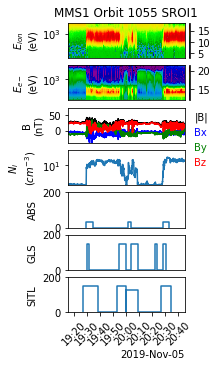

In [7]:
# Plot the magnetopause interval
fig, axes = util.plot_burst_selections(sc, t0, t1, figsize=(2.8,5))
axes[0][0].images[0].set_clim(i_clim)
axes[0][0].set_title('{0} Orbit {1} SROI{2}'.format(sc.upper(), orbit, sroi))
axes[1][0].images[0].set_clim(e_clim)
axes[2][0].set_ylim(b_lim)
axes[3][0].set_ylim(n_lim)
for i in range(3):
    axes[i+4][0].set_ylim(sel_lim)

# Save the figure
if outdir is not None:
    plt.savefig(outdir / 'figure_case-studies_orbit-{0}_sroi-{1}.{2}'.format(orbit, sroi, fig_type),
                dpi=300, transparent=True)
plt.show()

<a id='fig_middle'></a>
## GLS and SITL select MP, ABS does not¶
The following plot highlights a time interval in which the SITL and GLS selected the magnetopause but the ABS did not. It is taken from SROI1 in orbit 1067.

In [8]:
t0 = dt.datetime(2019, 11, 16, 7, 15, 0)
t1 = dt.datetime(2019, 11, 16, 8, 45, 0)
orbit = api.time_to_orbit(t0)
sroi = 1

Get the SITL, ABS, and GLS selections.

In [9]:
# 'sitl+back' option includes selections submitted to the back structure
# 'mp-dl-unh' is the name of the GLS model
sitl_data = sel.selections('sitl+back', t0, t1, combine=True, sort=True)
abs_data = sel.selections('abs', t0, t1, combine=True, sort=True)
gls_data = sel.selections('mp-dl-unh', t0, t1, combine=True, sort=True)

print('|------------------------------------------------------------------------')
print('| Selections made on orbit {0} between {1} and {2}'.format(orbit, t0, t1))
print('|--------------------------|')
print('| SITL and Back Structure: |')
print('|--------------------------|')
sel.print_segments(sitl_data)
print('|------|')
print('| ABS: |')
print('|------|')
sel.print_segments(abs_data)
print('|------|')
print('| GLS: |')
print('|------|')
sel.print_segments(gls_data)

GLS Selection Adjustments:
  # files skipped:    6
  # entries skipped:  0
  # entries expanded: 5
|------------------------------------------------------------------------
| Selections made on orbit 1058 between 2019-11-16 07:15:00 and 2019-11-16 08:45:00
|--------------------------|
| SITL and Back Structure: |
|--------------------------|
             TSTART                 TSTOP   FOM   DISCUSSION
2019-11-16 07:22:33   2019-11-16 07:31:23    35   Cold ions
2019-11-16 07:38:23   2019-11-16 07:39:13   200   FPI Burst Cal - Segment 2 (1058) - H2 - MSP
2019-11-16 07:44:23   2019-11-16 07:59:03    35   Boundary layer
2019-11-16 08:01:33   2019-11-16 08:02:23   200   FPI Burst Cal - Segment 3 (1058) - H2 - MSP
2019-11-16 08:07:13   2019-11-16 08:10:43    70   BL Traversal
2019-11-16 08:10:53   2019-11-16 08:12:23    35   Additional context between BL traversals
2019-11-16 08:12:33   2019-11-16 08:14:33    70   BL Traversal
2019-11-16 08:17:13   2019-11-16 08:19:33    70   BL Traversal
20

Save the selections to a CSV file.

In [10]:
# Save the selections
if outdir is not None:
    sel.write_csv(outdir / 'table_case-studies_orbit-{0}_sroi-{1}.csv'.format(orbit, sroi),
                  [*sitl_data, *abs_data, *gls_data])

Create the figure

GLS Selection Adjustments:
  # files skipped:    6
  # entries skipped:  0
  # entries expanded: 5


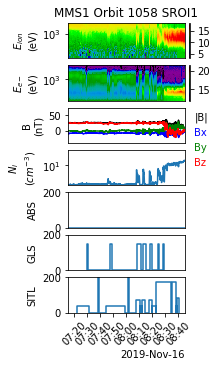

In [11]:
# Plot the magnetopause interval on orbit 1062
fig, axes = util.plot_burst_selections(sc, t0, t1, figsize=(2.8,5))
axes[0][0].images[0].set_clim(i_clim)
axes[0][0].set_title('{0} Orbit {1} SROI{2}'.format(sc.upper(), orbit, sroi))
axes[1][0].images[0].set_clim(e_clim)
axes[2][0].set_ylim(b_lim)
axes[3][0].set_ylim(n_lim)
for i in range(3):
    axes[i+4][0].set_ylim(sel_lim)

# Save the figure
if outdir is not None:
    plt.savefig(outdir / 'figure_case-studies_orbit-{0}_sroi-{1}.{2}'.format(orbit, sroi, fig_type),
                dpi=300, transparent=True)
plt.show()

<a id='fig_right'></a>
## ABS and SILT select MP, GLS does not
Most to all of the SITL selections in all of the SROI 1s were at least partially selected by the GLS. There are very few intervals in SROI 3 that were selected by the GLS. The following plot highlights a time interval in which the SITL and ABS selected the magnetopause but the GLS did not. It is taken from SROI 3 in orbit 1075.

In [12]:
t0 = dt.datetime(2020, 1, 17, 19, 50, 0)
t1 = dt.datetime(2020, 1, 17, 20, 30, 0)
orbit = api.time_to_orbit(t0)
sroi = 3

Get the SITL, ABS, and GLS selections

In [13]:
# 'sitl+back' option includes selections submitted to the back structure
# 'mp-dl-unh' is the name of the GLS model
sitl_data = sel.selections('sitl+back', t0, t1, combine=True, sort=True)
abs_data = sel.selections('abs', t0, t1, combine=True, sort=True)
gls_data = sel.selections('mp-dl-unh', t0, t1, combine=True, sort=True)

print('|------------------------------------------------------------------------')
print('| Selections made on orbit {0} between {1} and {2}'.format(orbit, t0, t1))
print('|--------------------------|')
print('| SITL and Back Structure: |')
print('|--------------------------|')
sel.print_segments(sitl_data)
print('|------|')
print('| ABS: |')
print('|------|')
sel.print_segments(abs_data)
print('|------|')
print('| GLS: |')
print('|------|')
sel.print_segments(gls_data)

GLS Selection Adjustments:
  # files skipped:    14
  # entries skipped:  6
  # entries expanded: 0
|------------------------------------------------------------------------
| Selections made on orbit 1075 between 2020-01-17 19:50:00 and 2020-01-17 20:30:00
|--------------------------|
| SITL and Back Structure: |
|--------------------------|
             TSTART                 TSTOP   FOM   DISCUSSION
2020-01-17 20:00:13   2020-01-17 20:01:43   105   Magnetosheath IMF rotation with bifurcated signature - unresolved exhaust
2020-01-17 20:02:23   2020-01-17 20:02:53   125   Potential msheath flux rope
2020-01-17 20:08:43   2020-01-17 20:13:03   175   High-shear complete MP
2020-01-17 20:13:13   2020-01-17 20:15:23   125   Partial MPs with Vz&lt;0 jetting
2020-01-17 20:15:33   2020-01-17 20:15:53    45   Fill
2020-01-17 20:16:03   2020-01-17 20:17:23   125   Partial MPs
2020-01-17 20:17:33   2020-01-17 20:18:33    45   Fill
2020-01-17 20:18:43   2020-01-17 20:20:23   125   Partial MPs
20

Save the selections to a CSV file.

In [14]:
# Save the selections
if outdir is not None:
    sel.write_csv(outdir / 'table_case-studies_orbit-{0}_sroi-{1}.csv'.format(orbit, sroi),
                  [*sitl_data, *abs_data, *gls_data])

Create the figure.

GLS Selection Adjustments:
  # files skipped:    14
  # entries skipped:  6
  # entries expanded: 0


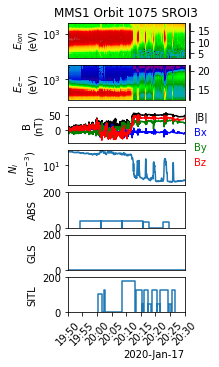

In [15]:
# Plot the magnetopause interval on orbit 1075
fig, axes = util.plot_burst_selections(sc, t0, t1, figsize=(2.8,5))
axes[0][0].images[0].set_clim(i_clim)
axes[0][0].set_title('{0} Orbit {1} SROI{2}'.format(sc.upper(), orbit, sroi))
axes[1][0].images[0].set_clim(e_clim)
axes[2][0].set_ylim(b_lim)
axes[3][0].set_ylim(n_lim)
for i in range(3):
    axes[i+4][0].set_ylim(sel_lim)

if outdir is not None:
    plt.savefig(outdir / 'figure_case-studies_orbit-{0}_sroi-{1}.{2}'.format(orbit, sroi, fig_type),
                dpi=300, transparent=True)
plt.show()